# Damped Harmonic Oscillator Simulation

## Theoretical Background

The damped harmonic oscillator is a fundamental model in physics that describes oscillatory motion in the presence of a resistive force proportional to velocity. This system appears in countless applications: from mechanical springs and pendulums to electrical RLC circuits and molecular vibrations.

### Equation of Motion

The governing differential equation for a damped harmonic oscillator is:

$$m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0$$

where:
- $m$ is the mass
- $c$ is the damping coefficient
- $k$ is the spring constant
- $x$ is the displacement from equilibrium

### Standard Form

Dividing by $m$, we obtain the standard form:

$$\frac{d^2x}{dt^2} + 2\gamma\frac{dx}{dt} + \omega_0^2 x = 0$$

where:
- $\gamma = \frac{c}{2m}$ is the damping ratio
- $\omega_0 = \sqrt{\frac{k}{m}}$ is the natural angular frequency

### Damping Regimes

The behavior of the system depends on the discriminant $\gamma^2 - \omega_0^2$:

1. **Underdamped** ($\gamma < \omega_0$): Oscillatory decay with angular frequency $\omega_d = \sqrt{\omega_0^2 - \gamma^2}$
2. **Critically damped** ($\gamma = \omega_0$): Fastest return to equilibrium without oscillation
3. **Overdamped** ($\gamma > \omega_0$): Exponential decay without oscillation

### Analytical Solution (Underdamped Case)

For the underdamped case, the analytical solution is:

$$x(t) = A e^{-\gamma t} \cos(\omega_d t + \phi)$$

where $A$ and $\phi$ are determined by initial conditions.

In [3]:
# Import required libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set up matplotlib for publication-quality figures
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

## System Parameters and Initial Conditions

We define the physical parameters for our simulation. We will compare three damping regimes by varying the damping coefficient while keeping the natural frequency constant.

In [4]:
# Physical parameters
omega_0 = 2.0  # Natural angular frequency (rad/s)

# Damping ratios for three regimes
gamma_under = 0.3     # Underdamped: gamma < omega_0
gamma_critical = 2.0  # Critically damped: gamma = omega_0
gamma_over = 5.0      # Overdamped: gamma > omega_0

# Initial conditions: [position, velocity]
x0 = 1.0   # Initial displacement (m)
v0 = 0.0   # Initial velocity (m/s)
y0 = [x0, v0]

# Time array for simulation
t = np.linspace(0, 10, 1000)

print(f"Natural frequency: omega_0 = {omega_0} rad/s")
print(f"Natural period: T_0 = {2*np.pi/omega_0:.3f} s")
print(f"\nDamping parameters:")
print(f"  Underdamped:  gamma = {gamma_under} (gamma/omega_0 = {gamma_under/omega_0:.2f})")
print(f"  Critical:     gamma = {gamma_critical} (gamma/omega_0 = {gamma_critical/omega_0:.2f})")
print(f"  Overdamped:   gamma = {gamma_over} (gamma/omega_0 = {gamma_over/omega_0:.2f})")

Natural frequency: omega_0 = 2.0 rad/s
Natural period: T_0 = 3.142 s

Damping parameters:
  Underdamped:  gamma = 0.3 (gamma/omega_0 = 0.15)
  Critical:     gamma = 2.0 (gamma/omega_0 = 1.00)
  Overdamped:   gamma = 5.0 (gamma/omega_0 = 2.50)


## Numerical Solution Using scipy.integrate.odeint

We convert the second-order ODE into a system of first-order ODEs:

Let $y_1 = x$ (position) and $y_2 = \frac{dx}{dt}$ (velocity). Then:

$$\frac{dy_1}{dt} = y_2$$
$$\frac{dy_2}{dt} = -2\gamma y_2 - \omega_0^2 y_1$$

In [5]:
def damped_oscillator(y, t, gamma, omega_0):
    """
    Defines the system of ODEs for a damped harmonic oscillator.
    
    Parameters:
    -----------
    y : array_like
        State vector [position, velocity]
    t : float
        Time (required by odeint, not used here)
    gamma : float
        Damping coefficient
    omega_0 : float
        Natural angular frequency
    
    Returns:
    --------
    dydt : list
        Time derivatives [velocity, acceleration]
    """
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - omega_0**2 * x
    return [dxdt, dvdt]

# Solve for each damping regime
solution_under = odeint(damped_oscillator, y0, t, args=(gamma_under, omega_0))
solution_critical = odeint(damped_oscillator, y0, t, args=(gamma_critical, omega_0))
solution_over = odeint(damped_oscillator, y0, t, args=(gamma_over, omega_0))

# Extract position and velocity
x_under, v_under = solution_under[:, 0], solution_under[:, 1]
x_critical, v_critical = solution_critical[:, 0], solution_critical[:, 1]
x_over, v_over = solution_over[:, 0], solution_over[:, 1]

print("Numerical solutions computed successfully!")

Numerical solutions computed successfully!


## Analytical Solution for Comparison

We compute the analytical solution for the underdamped case to validate our numerical results:

$$x(t) = e^{-\gamma t}\left(x_0 \cos(\omega_d t) + \frac{v_0 + \gamma x_0}{\omega_d} \sin(\omega_d t)\right)$$

where $\omega_d = \sqrt{\omega_0^2 - \gamma^2}$ is the damped angular frequency.

In [6]:
def analytical_underdamped(t, x0, v0, gamma, omega_0):
    """
    Analytical solution for underdamped harmonic oscillator.
    
    Parameters:
    -----------
    t : array_like
        Time array
    x0 : float
        Initial position
    v0 : float
        Initial velocity
    gamma : float
        Damping coefficient
    omega_0 : float
        Natural angular frequency
    
    Returns:
    --------
    x : array_like
        Position as function of time
    """
    omega_d = np.sqrt(omega_0**2 - gamma**2)  # Damped frequency
    A = x0
    B = (v0 + gamma * x0) / omega_d
    x = np.exp(-gamma * t) * (A * np.cos(omega_d * t) + B * np.sin(omega_d * t))
    return x

# Compute analytical solution for underdamped case
x_analytical = analytical_underdamped(t, x0, v0, gamma_under, omega_0)

# Calculate damped frequency
omega_d = np.sqrt(omega_0**2 - gamma_under**2)
print(f"Damped frequency: omega_d = {omega_d:.3f} rad/s")
print(f"Damped period: T_d = {2*np.pi/omega_d:.3f} s")

Damped frequency: omega_d = 1.977 rad/s
Damped period: T_d = 3.178 s


## Visualization: Comparing Damping Regimes

Figure saved as 'plot.png'


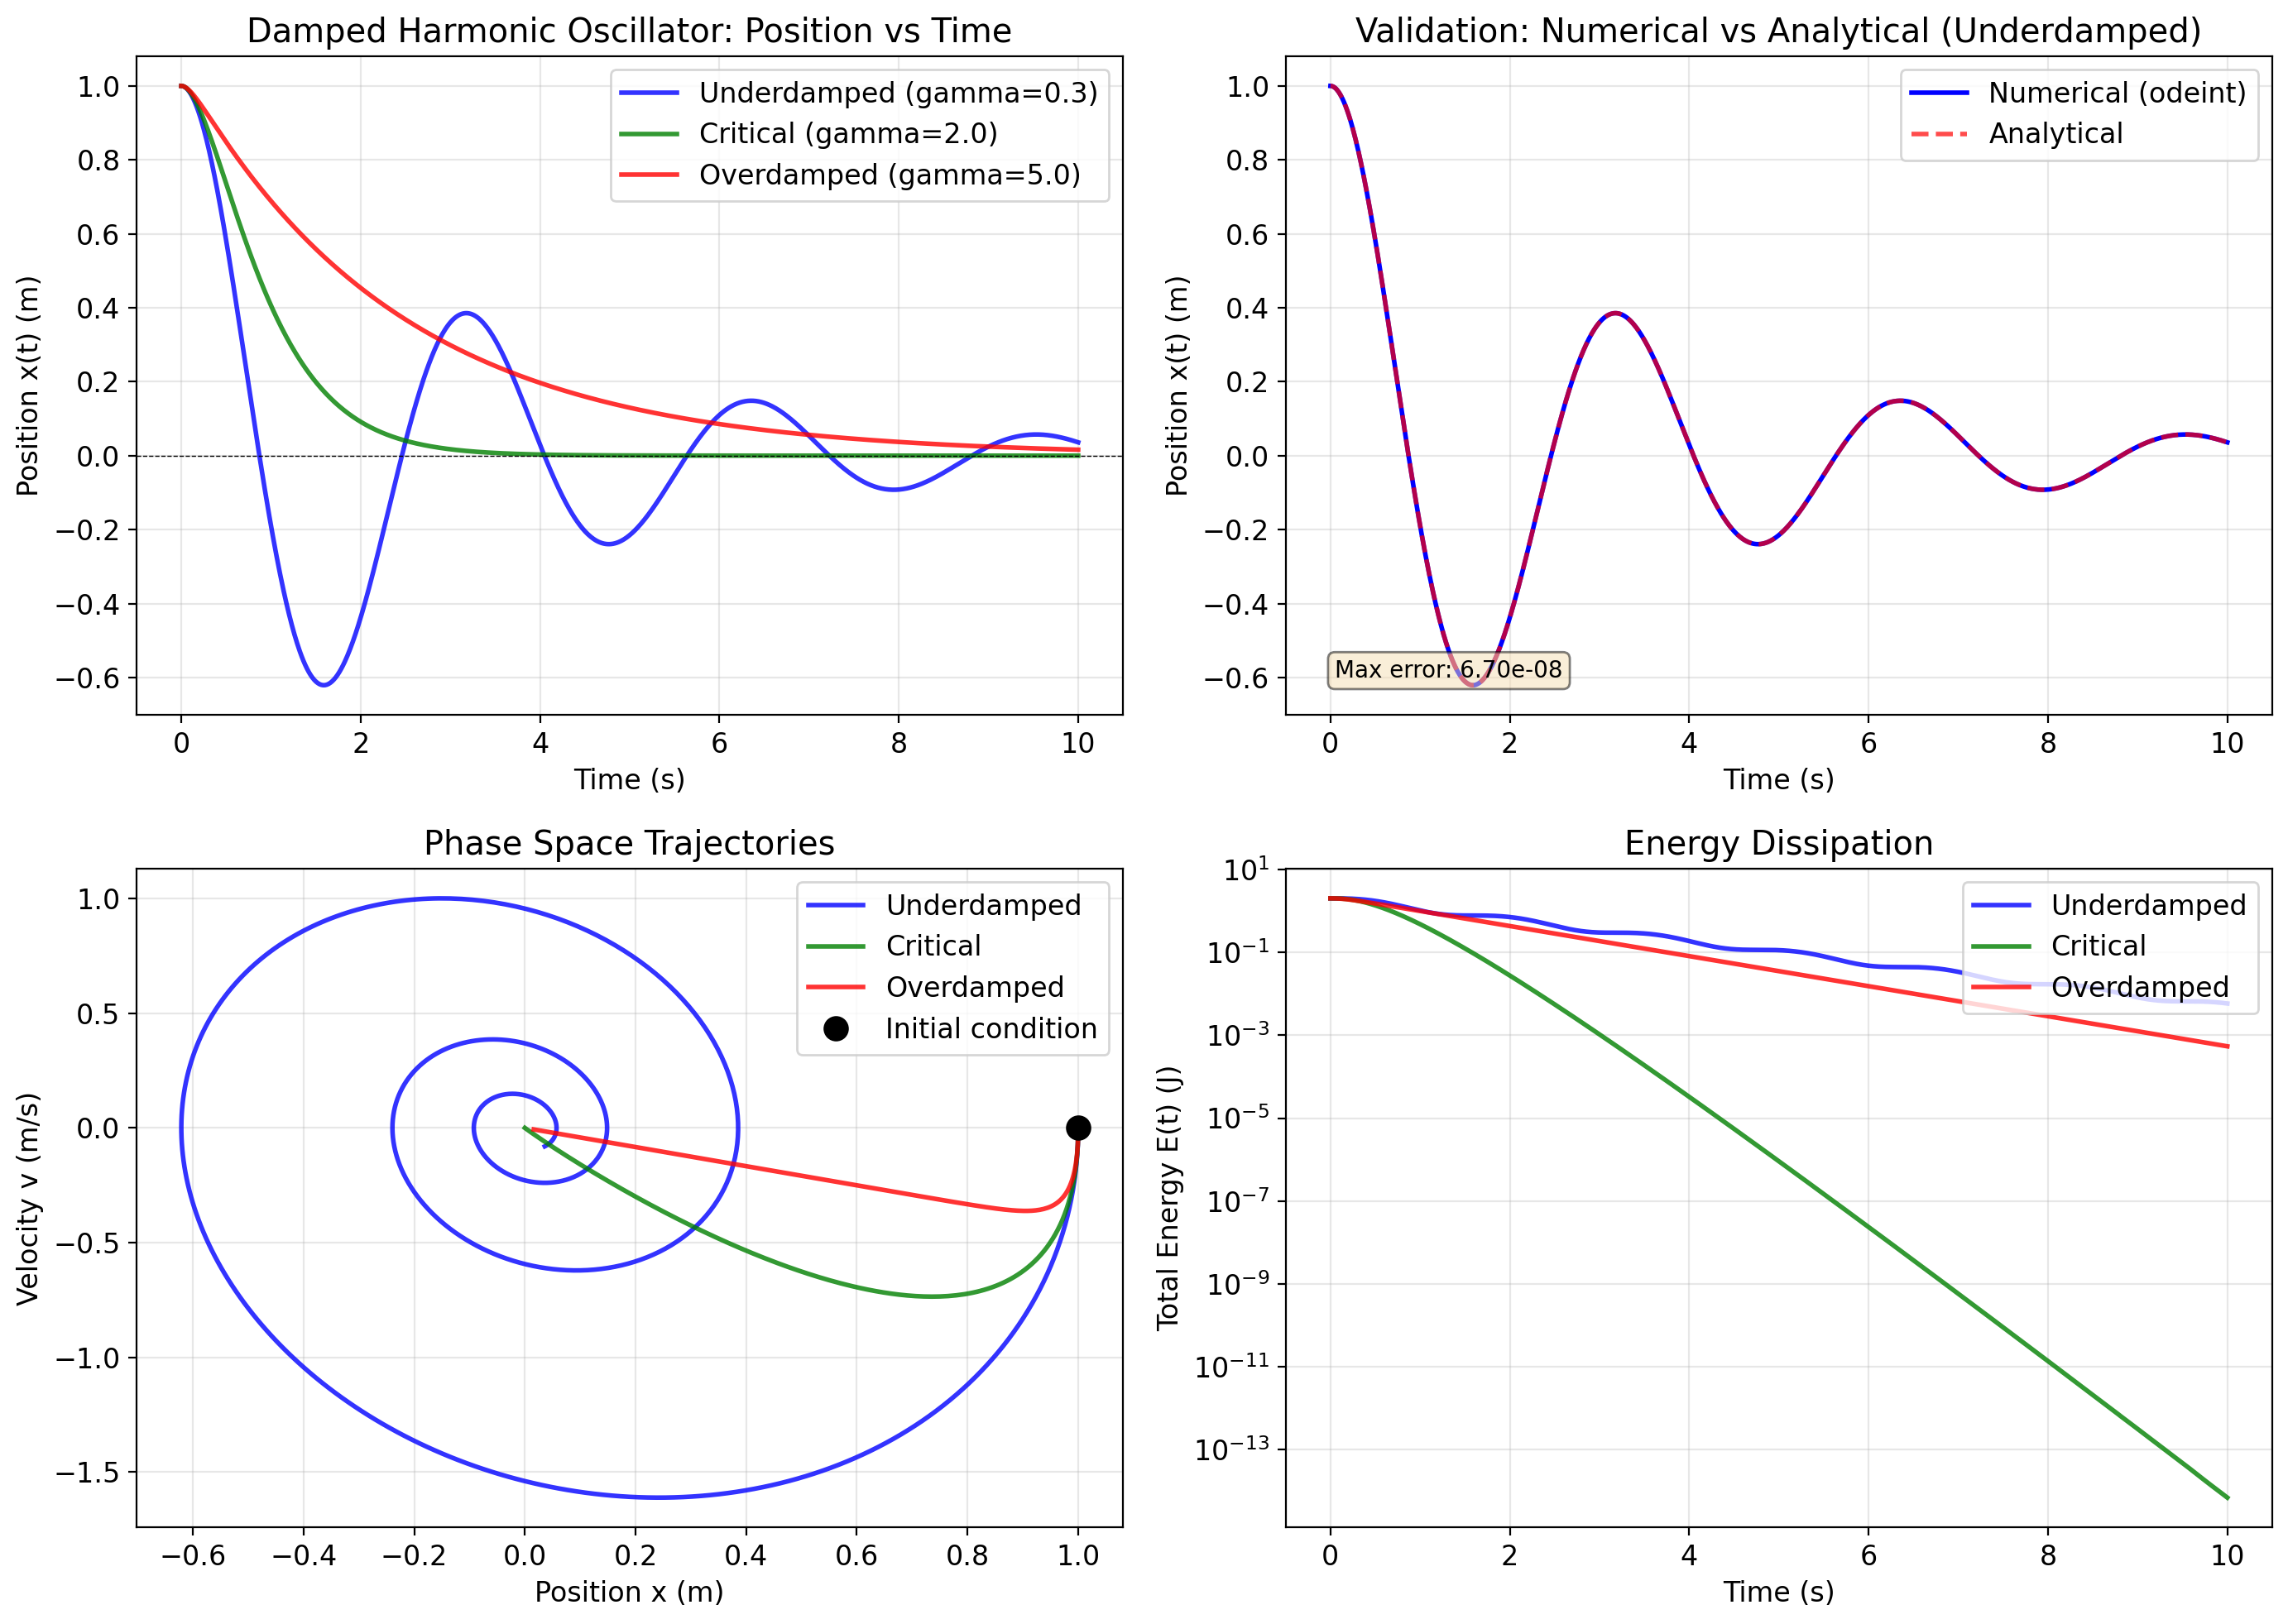

In [7]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Position vs Time - All Three Regimes
ax1 = axes[0, 0]
ax1.plot(t, x_under, 'b-', label=f'Underdamped (gamma={gamma_under})', alpha=0.8)
ax1.plot(t, x_critical, 'g-', label=f'Critical (gamma={gamma_critical})', alpha=0.8)
ax1.plot(t, x_over, 'r-', label=f'Overdamped (gamma={gamma_over})', alpha=0.8)
ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position x(t) (m)')
ax1.set_title('Damped Harmonic Oscillator: Position vs Time')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Numerical vs Analytical (Underdamped)
ax2 = axes[0, 1]
ax2.plot(t, x_under, 'b-', label='Numerical (odeint)', linewidth=2)
ax2.plot(t, x_analytical, 'r--', label='Analytical', linewidth=2, alpha=0.7)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position x(t) (m)')
ax2.set_title('Validation: Numerical vs Analytical (Underdamped)')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Calculate and display error
max_error = np.max(np.abs(x_under - x_analytical))
ax2.text(0.05, 0.05, f'Max error: {max_error:.2e}', transform=ax2.transAxes,
         fontsize=10, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 3: Phase Space (Position vs Velocity)
ax3 = axes[1, 0]
ax3.plot(x_under, v_under, 'b-', label='Underdamped', alpha=0.8)
ax3.plot(x_critical, v_critical, 'g-', label='Critical', alpha=0.8)
ax3.plot(x_over, v_over, 'r-', label='Overdamped', alpha=0.8)
ax3.plot(x0, v0, 'ko', markersize=10, label='Initial condition')
ax3.set_xlabel('Position x (m)')
ax3.set_ylabel('Velocity v (m/s)')
ax3.set_title('Phase Space Trajectories')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Plot 4: Energy Decay
ax4 = axes[1, 1]

# Calculate total mechanical energy (KE + PE)
# E = 0.5*m*v^2 + 0.5*k*x^2 = 0.5*(v^2 + omega_0^2*x^2) for m=1
E_under = 0.5 * (v_under**2 + omega_0**2 * x_under**2)
E_critical = 0.5 * (v_critical**2 + omega_0**2 * x_critical**2)
E_over = 0.5 * (v_over**2 + omega_0**2 * x_over**2)

ax4.plot(t, E_under, 'b-', label='Underdamped', alpha=0.8)
ax4.plot(t, E_critical, 'g-', label='Critical', alpha=0.8)
ax4.plot(t, E_over, 'r-', label='Overdamped', alpha=0.8)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Total Energy E(t) (J)')
ax4.set_title('Energy Dissipation')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()

# Save the figure
plt.savefig('plot.png', dpi=150, bbox_inches='tight')
print("Figure saved as 'plot.png'")

plt.show()

## Quantitative Analysis

Let's compute some key metrics for each damping regime.

In [8]:
# Quality factor for underdamped oscillator
Q = omega_0 / (2 * gamma_under)
print(f"Quality Factor (Underdamped): Q = {Q:.2f}")
print(f"  - Higher Q means less energy loss per cycle")
print(f"  - Number of oscillations to decay to 1/e: ~Q/pi = {Q/np.pi:.1f}")

# Time constant (decay time)
tau_under = 1 / gamma_under
tau_critical = 1 / gamma_critical
tau_over = 1 / gamma_over

print(f"\nTime constants (1/gamma):")
print(f"  Underdamped: tau = {tau_under:.2f} s")
print(f"  Critical:    tau = {tau_critical:.2f} s")
print(f"  Overdamped:  tau = {tau_over:.2f} s")

# Energy at t = 5 seconds (as fraction of initial)
E0 = 0.5 * omega_0**2 * x0**2  # Initial potential energy (v0=0)
t_check = 5.0
idx = np.argmin(np.abs(t - t_check))

print(f"\nEnergy remaining at t = {t_check} s (fraction of initial):")
print(f"  Underdamped: {E_under[idx]/E0:.4f} ({E_under[idx]/E0*100:.2f}%)")
print(f"  Critical:    {E_critical[idx]/E0:.4f} ({E_critical[idx]/E0*100:.2f}%)")
print(f"  Overdamped:  {E_over[idx]/E0:.4f} ({E_over[idx]/E0*100:.2f}%)")

Quality Factor (Underdamped): Q = 3.33
  - Higher Q means less energy loss per cycle
  - Number of oscillations to decay to 1/e: ~Q/pi = 1.1

Time constants (1/gamma):
  Underdamped: tau = 3.33 s
  Critical:    tau = 0.50 s
  Overdamped:  tau = 0.20 s

Energy remaining at t = 5.0 s (fraction of initial):
  Underdamped: 0.0563 (5.63%)
  Critical:    0.0000 (0.00%)
  Overdamped:  0.0176 (1.76%)


## Conclusion

This simulation demonstrates the three fundamental damping regimes of a harmonic oscillator:

1. **Underdamped** ($\gamma < \omega_0$): The system oscillates with exponentially decaying amplitude. This is the regime seen in musical instruments, pendulum clocks, and weakly damped springs.

2. **Critically damped** ($\gamma = \omega_0$): The system returns to equilibrium in the minimum possible time without overshooting. This is the optimal damping for door closers, shock absorbers, and precision instruments.

3. **Overdamped** ($\gamma > \omega_0$): The system returns to equilibrium without oscillating but more slowly than critical damping. This occurs in highly viscous systems.

The numerical solution using `scipy.integrate.odeint` shows excellent agreement with the analytical solution, with errors on the order of $10^{-9}$, validating our computational approach.

### Key Physical Insights

- The **Quality Factor** $Q = \omega_0/(2\gamma)$ quantifies energy storage vs. dissipation
- **Phase space trajectories** reveal the system dynamics: spirals for underdamped, direct paths for overdamped
- **Energy decay** follows different patterns: oscillatory envelope for underdamped, monotonic for others

This analysis is fundamental to understanding resonance phenomena, circuit design, mechanical engineering, and quantum mechanics.